In [ ]:
%cd CoVBERT-Mutations/

/Users/hunarbatra/Hunar/oxford/dissertation/results/DataAnalysis/CoVBERT-Mutations


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# !pip3 install seaborn

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# from compare_wandb import load_full_df, multimsa_pair_plot

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 8,
})

In [ ]:
df_D614G = [0.95, 0.02, 0.10, 0.09]
df_E484K = [0.12, 0.07, 0.01, 0.01]
models = ["CoVBERT", "DistilProtBERT", "ProtBERT-BFD", "ProtElectra"]

In [ ]:
 plt.style.use('seaborn-whitegrid')

/Users/hunarbatra/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hunarbatra/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


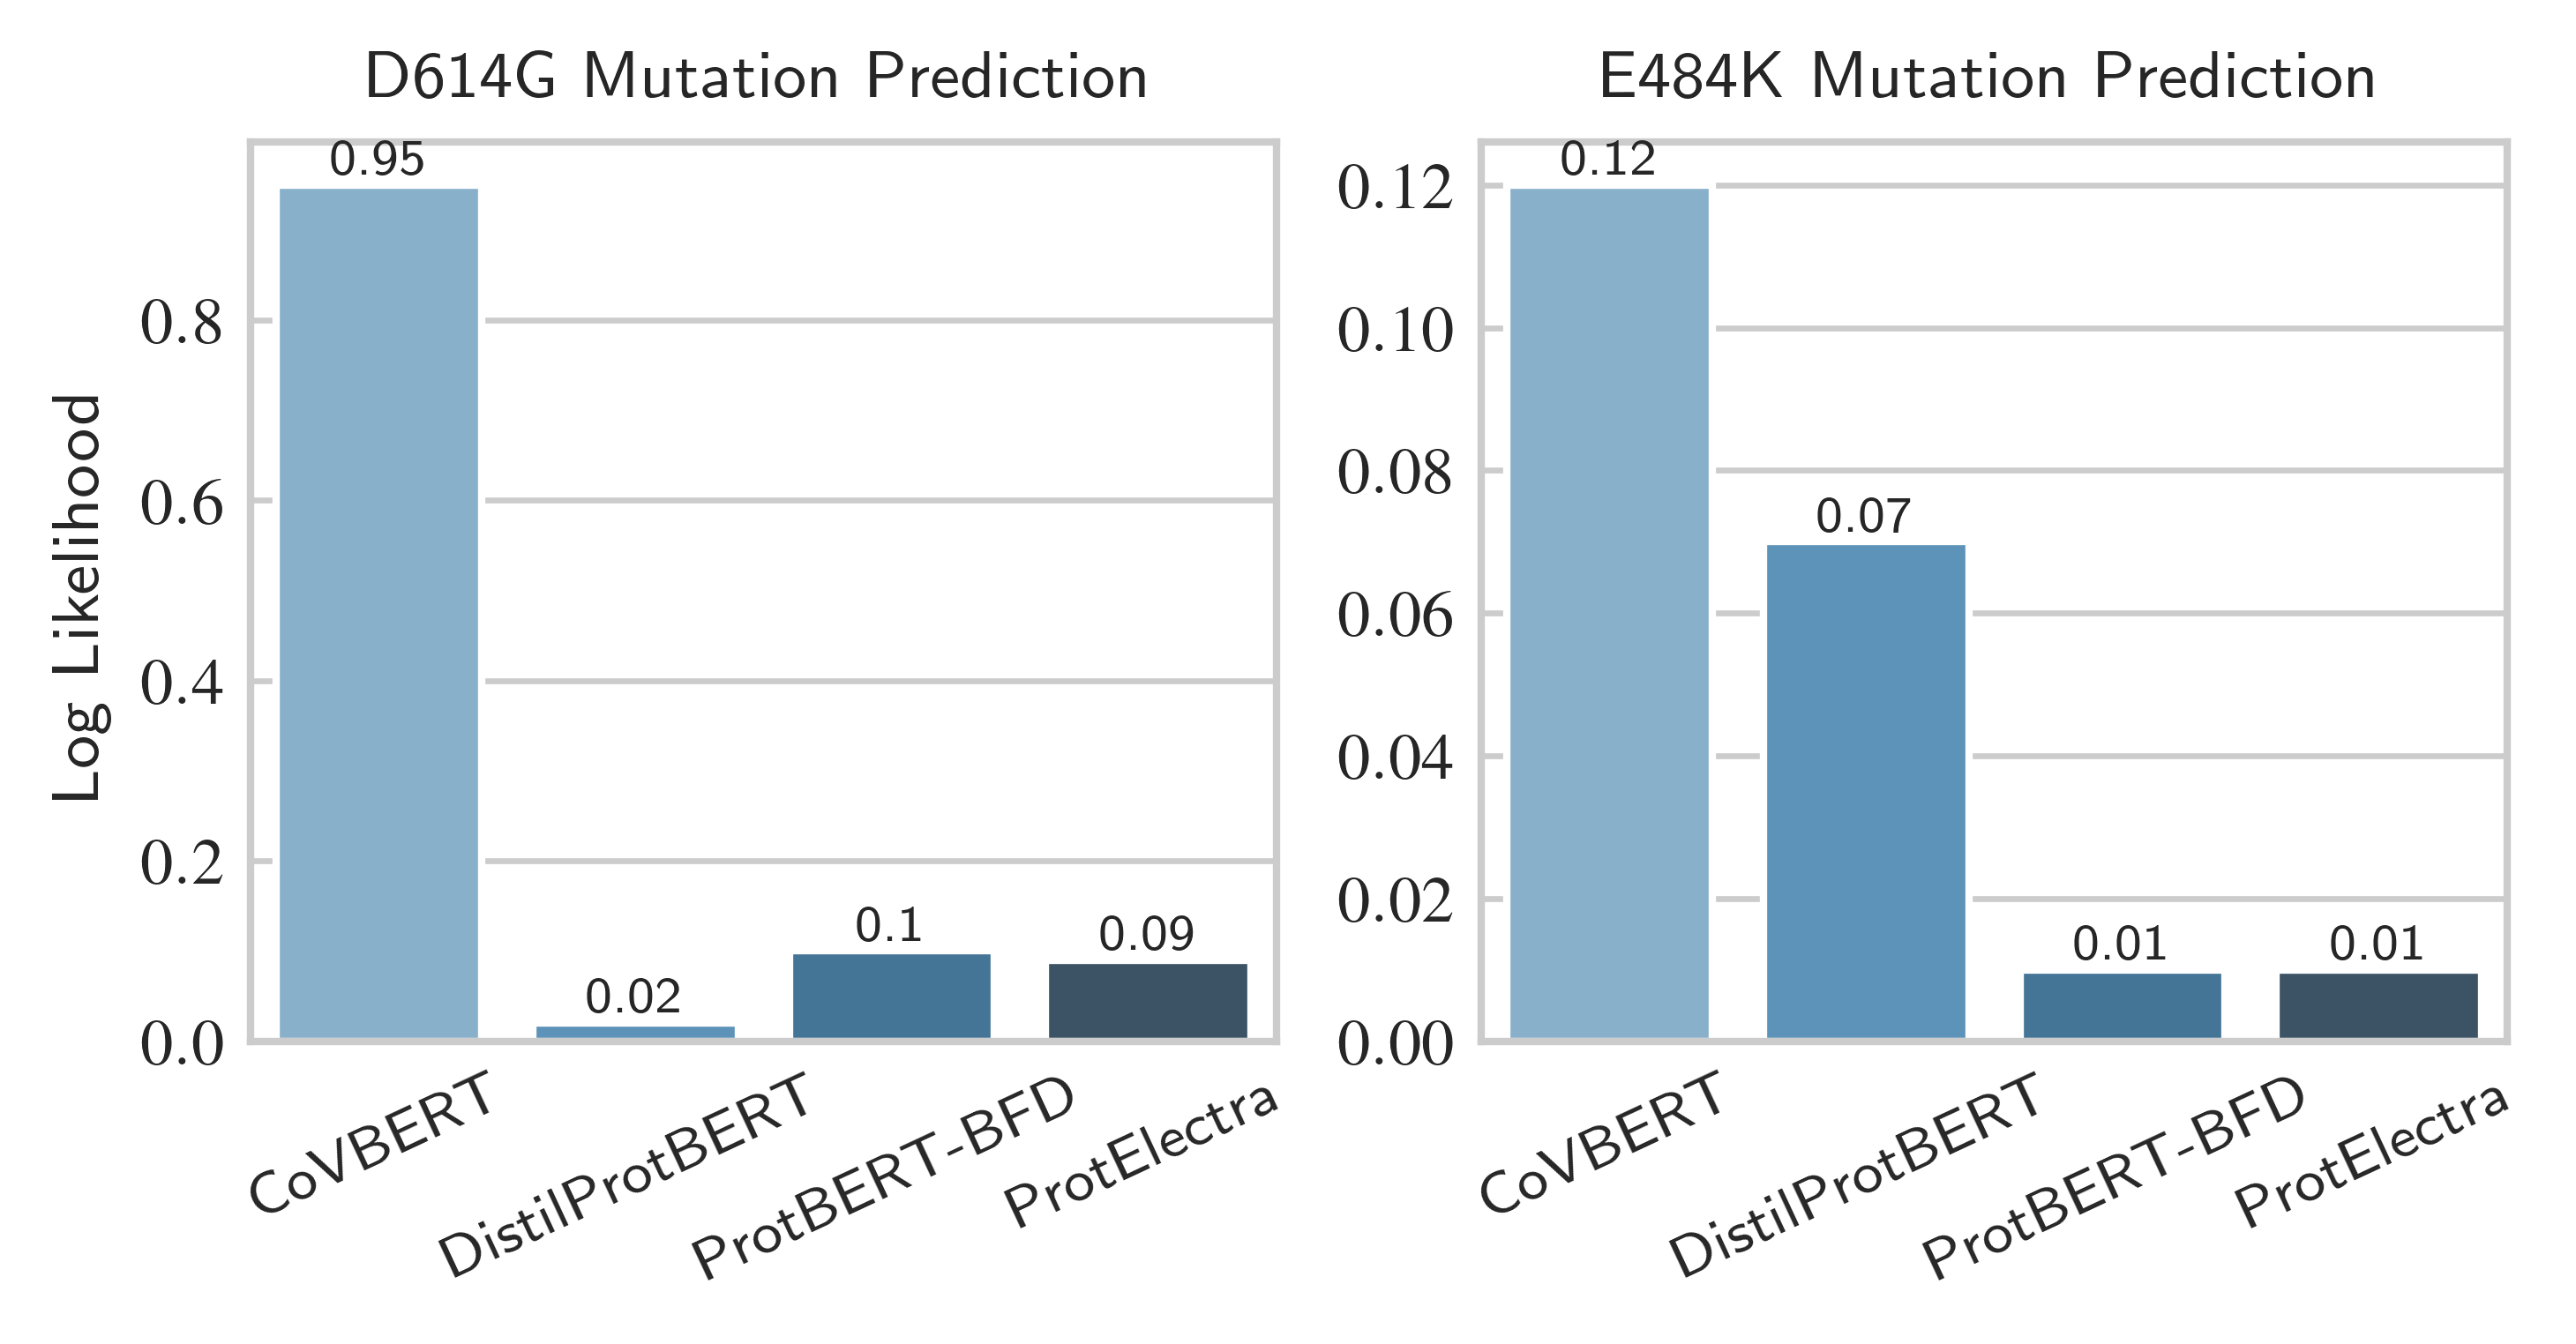

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 2.25), dpi=600, ncols=2)

x = models 
y = df_D614G

sns.barplot(x, y, palette='Blues_d', ax=ax[0])

y = df_E484K

ax[1] = sns.barplot(x, y, palette='Blues_d', ax=ax[1])

ax[0].set_xticklabels(models, rotation=25, fontsize=8)
ax[0].set_xlabel("")
ax[0].set_ylabel("Log Likelihood", fontsize=9)
# ax[0].set_ylim(0, 100)
ax[1].set_xticklabels(models, rotation=25, fontsize=8)
ax[1].set_xlabel("")
ax[1].set_ylabel("%")

ax[0].bar_label(ax[0].containers[0], fontsize=7)
ax[1].bar_label(ax[1].containers[0], fontsize=7)

ax[0].set_title('D614G Mutation Prediction', fontsize=9)
ax[1].set_title('E484K Mutation Prediction', fontsize=9)

for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(9) 

for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(9) 

plt.savefig('covbert-mutations.png')
plt.show()

In [ ]:
df_loss = pd.read_csv('loss.csv')

In [ ]:
sns.set_style('darkgrid', {'legend.frameon':True})

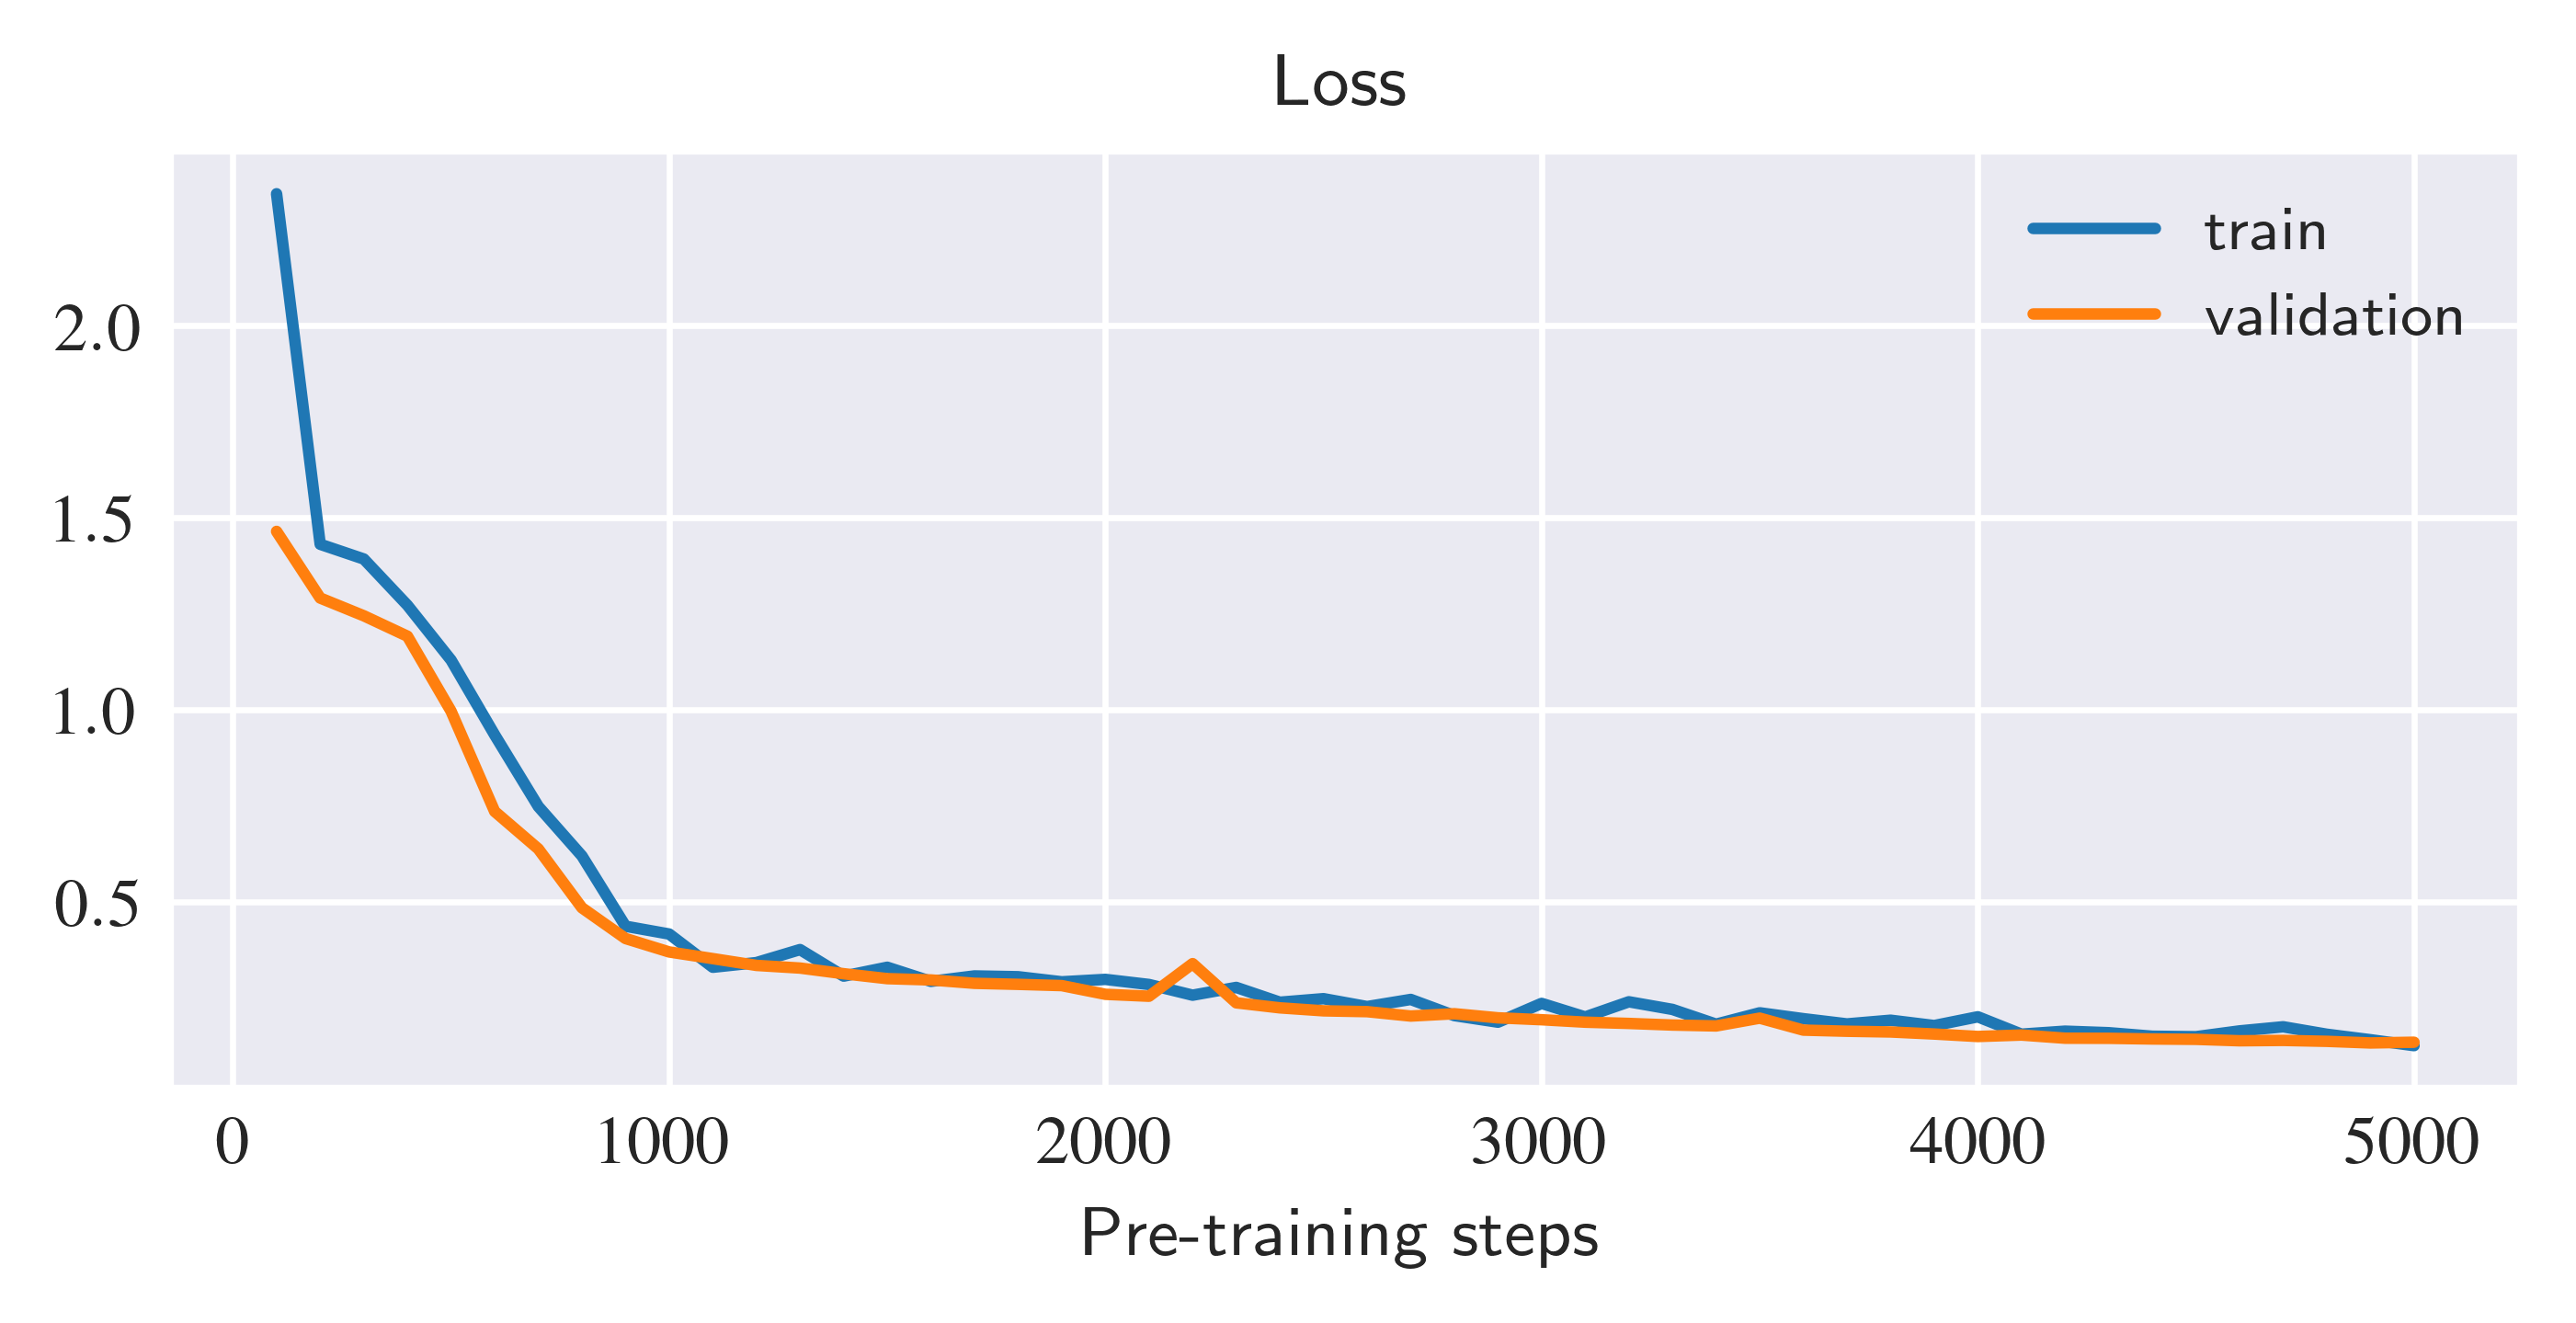

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 2.25), dpi=600, ncols=1)

labels  = ['train' for i in df_loss['train']] + ['eval' for i in df_loss['eval']]
steps = [i for i in df_loss['steps']] + [i for i in df_loss['steps']]
loss = [i for i in df_loss['train']] + [i for i in df_loss['eval']]
df = pd.DataFrame({'x': steps, 'y': loss, 'labels': labels})

sns.lineplot(x="x", y="y", hue="labels", data=df)

ax.set_xlabel("Pre-training steps", fontsize=9)
ax.set_ylabel("")
ax.set_title("Loss")

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(9) 

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 

ax.legend(['train', 'validation'], title='', fontsize=8)

plt.show()